# WORKSHOP 2

------------

**<u>Digital House<u>**

Agustin Stigliano




In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LinearRegression

In [3]:
def lista_featurend(X, label_i):
    for i in range(len(X.columns)):
        if list(X.columns)[i] == label_i:
            lista_featur_end = list(X.columns)[i:]
    return lista_featur_end


def cambia_nombre_columnas(data, **kwarg):
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
    for key in kwarg.keys():
        data.rename(kwarg[key], axis=1, inplace=True)
    return data


def cambia_orden_columnas(
    check_list, data, safe=1
):  # safe: es para conservar la primera columna con indice[0]
    label_list = list(data.columns)
    for i in range(len(check_list)):
        label_list.remove(check_list[i])
        label_list.insert(i + safe, check_list[i])
        data = data.reindex(label_list, axis=1)


def data_info(data, name="data"):
    df = pd.DataFrame(pd.Series(data.columns))
    df.columns = ["columna"]
    df.columns.name = f"df de {name}"
    df.index.name = "index"
    df["Nan"] = data.isna().sum().values
    df["dtype"] = data.dtypes.values
    df["count"] = data.count().values
    df["pct_nan"] = round(df["Nan"] / data.shape[0] * 100, 2)
    df["count_unique"] = [
        len(data[elemento].value_counts()) for elemento in data.columns
    ]
    return df


def visualizacion_dos_scatter(frame1, frame2, x, y_1, y_2):
    x1 = frame1[x]
    x2 = frame2[x]
    y_real = frame1[y_1]
    y_pred = frame2[y_2]
    plt.scatter(x1, y_real)
    plt.scatter(x2, y_pred)  # muestra, entonces com
    plt.suptitle("y, y_pred")

    ax = plt.axes()  # instancia de un objeto
    # tiene atributos y tiene métodos
    # los atributos .algo y los métodos son .algo()
    #
    ax.set(xlabel="x", ylabel="price")
    # azules reales
    # naranjas predichos

    """
dame dos datasets, ya filtrados

# separame el eje x, de cualquier de los dos datasets
# armame una serie de cada valor real/predicho
"""


def variables_feature(frame):
    frame["sup_total_pow2"] = frame.surface_total_in_m2 * frame.surface_total_in_m2
    frame["sup_descubierta"] = frame.surface_total_in_m2 - frame.surface_covered_in_m2
    frame["sup_descubierta_pct"] = (
        frame.sup_descubierta / frame.surface_total_in_m2 * 100
    )
    frame = frame.drop("sup_descubierta", axis=1)
    return frame


def analisis_nans(frame):
    df = data_info(frame)
    lista_not_na = list((df[df.Nan == 0].columna).values)
    lista_con_na = list((df[df.Nan != 0].columna).values)

    print("ANALISIS DE NANS")
    print(frame[lista_con_na].isna().sum().to_string())
    # print ('La suma es {}'.format(3198+746))
    print("Cantidad de elemento: {}".format(frame[lista_con_na].shape[0]))
    print(
        "Interseccion entre los nan encuentra: {} elementos".format(
            frame[lista_con_na].isna().all(axis=1).sum()
        )
    )
    print(
        "Union entre los nan encuentra: {} elementos".format(
            frame[lista_con_na].isna().any(axis=1).sum()
        )
    )

In [4]:
data = pd.read_csv("data_apartment_5_final.csv")
data.drop(list(data.columns)[0], axis=1, inplace=True)
lista_columnas_1 = list(data.columns)[:9]
lista_columnas_2 = lista_featurend(data, "above_mean")
print(lista_columnas_1)
print(lista_columnas_2)
data = data.loc[:, lista_columnas_1 + lista_columnas_2]

Dicto = {}
Dicture = {}
Model = {}

['property_type', 'place_name', 'state_name', 'price', 'currency', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'place_name_2']
['above_mean', 'above_median']


In [5]:
df = data_info(data)
df

df de data,columna,Nan,dtype,count,pct_nan,count_unique
index,,,,,,
0,property_type,0,object,15942,0.00,1
1,place_name,0,object,15942,0.00,113
2,state_name,0,object,15942,0.00,5
3,price,0,float64,15942,0.00,2671
4,currency,0,object,15942,0.00,1
5,surface_total_in_m2,3198,float64,12744,20.06,168
6,surface_covered_in_m2,746,float64,15196,4.68,191
7,price_usd_per_m2,0,float64,15942,0.00,6332
8,place_name_2,0,object,15942,0.00,51


In [6]:
lista_not_na = list((df[df.Nan == 0].columna).values)
lista_con_na = list((df[df.Nan != 0].columna).values)

In [7]:
print("ANALISIS DE NANS")
print(data[lista_con_na].isna().sum().to_string())
print("La suma es {}".format(3198 + 746))
print("Cantidad de elemento: {}".format(data[lista_con_na].shape[0]))

print(
    "Interseccion entre los nan encuentra: {} elementos".format(
        data[lista_con_na].isna().all(axis=1).sum()
    )
)
print(
    "Union entre los nan encuentra: {} elementos".format(
        data[lista_con_na].isna().any(axis=1).sum()
    )
)

print("\nSe toma muestra de los valores y se los quita del dataset")

muestra = data[data[lista_con_na].isna().any(axis=1)]
df = data_info(muestra, "surface_nan")
data = data.drop(muestra.index)

Dicto["data_cruda"] = data.to_dict(), data_info(data).to_dict()  # data cruda sin nans
Dicto["surface_nan"] = muestra.to_dict(), df.to_dict()

ANALISIS DE NANS
surface_total_in_m2      3198
surface_covered_in_m2     746
La suma es 3944
Cantidad de elemento: 15942
Interseccion entre los nan encuentra: 0 elementos
Union entre los nan encuentra: 3944 elementos

Se toma muestra de los valores y se los quita del dataset


In [8]:
Dicto["data"] = data.to_dict(), data_info(data).to_dict()
Dicto["data_pred"] = (
    data.to_dict(),
    data_info(data).to_dict(),
)  # conservo columnas innecesarias pero cómodas a la vista

In [9]:
data = variables_feature(data)

dummy_place = pd.get_dummies(data["place_name_2"])
df = data_info(dummy_place)["columna"]

place_name_2 = data.place_name_2
data = data.drop("place_name_2", axis=1)

Dicto["data"] = (
    data.to_dict(),
    data_info(data).to_dict(),
)  # sin columnas innecesarias y con las columnas agregadas
Dicto["dummy_place"] = dummy_place.to_dict(), df.to_dict()

In [10]:
data

,property_type,place_name,state_name,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,above_mean,above_median,sup_total_pow2,sup_descubierta_pct
0,apartment,Mataderos,Capital Federal,72000.000000,USD,55.0,55.0,1309.090909,0.0,1.0,3025.0,0.000000
1,apartment,Mataderos,Capital Federal,67000.000000,USD,40.0,28.0,1675.000000,0.0,0.0,1600.0,30.000000
2,apartment,Mataderos,Capital Federal,90000.000000,USD,52.0,48.0,1730.769231,0.0,1.0,2704.0,7.692308
3,apartment,Mataderos,Capital Federal,88000.000000,USD,50.0,38.0,1760.000000,0.0,0.0,2500.0,24.000000
4,apartment,Mataderos,Capital Federal,93600.000000,USD,51.0,46.0,1835.294118,0.0,0.0,2601.0,9.803922
...,...,...,...,...,...,...,...,...,...,...,...,...
15937,apartment,Merlo,Bs.As. G.B.A. Zona Oeste,63759.245132,USD,36.0,33.0,1752.614722,0.0,1.0,1296.0,8.333333
15938,apartment,Merlo,Bs.As. G.B.A. Zona Oeste,63759.245132,USD,36.0,33.0,1752.614722,0.0,1.0,1296.0,8.333333
15939,apartment,Merlo,Bs.As. G.B.A. Zona Oeste,52140.893797,USD,30.0,28.0,1719.899333,0.0,0.0,900.0,6.666667
15940,apartment,Merlo,Bs.As. G.B.A. Zona Oeste,58375.131099,USD,34.0,32.0,1699.005294,0.0,0.0,1156.0,5.882353


In [11]:
# modulo de visualizacion de columnas
print(pd.Series(data.columns).to_string())

0             property_type
1                place_name
2                state_name
3                     price
4                  currency
5       surface_total_in_m2
6     surface_covered_in_m2
7          price_usd_per_m2
8                above_mean
9              above_median
10           sup_total_pow2
11      sup_descubierta_pct


## Entrenamiento del modelo de regresión lineal

In [12]:
## Celda 12: contenido
# 1. Seleccion de la clase de modelo
from sklearn.linear_model import LinearRegression

# 2. Elegir los hiperparámetros del modelo
linreg = LinearRegression(
    normalize=True
)  # False: default but then change to True and see changes

# 3. Preparar los datos en una matriz de features, y un vector target

features_1 = [
    "surface_total_in_m2",
    "sup_total_pow2",
    "sup_descubierta_pct",
    "above_mean",
]
features_2 = [
    "surface_total_in_m2",
    "sup_total_pow2",
    "sup_descubierta_pct",
    "above_median",
]


X = pd.concat([data[features_1], dummy_place], axis=1)


y = data.price
y = y[y.index.intersection(X.index)]

# 4. Separar los sets de entrenamiento y de testing
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

# 5. Ajustar el modelo a los datos de entrenamiento
linreg.fit(Xtrain, ytrain)

# 6. Predecir etiquetas para datos desconocidos
y_pred = linreg.predict(Xtest)

# 7. Evaluar la perfomance del modelo

from sklearn import metrics

print("MAE:", metrics.mean_absolute_error(ytest, y_pred))
print("MSE:", metrics.mean_squared_error(ytest, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print("R2:", metrics.r2_score(ytest, y_pred))

MAE: 26221.099962067852
MSE: 1309469393.2819934
RMSE: 36186.591346547044
R2: 0.8298430396074956


In [13]:
## Celda 13
y_pred_train = linreg.predict(Xtrain)
Dicture["linreg"] = (
    X,
    pd.DataFrame(y),
    pd.DataFrame({"B_0": {"linreg": linreg.intercept_}}),
    linreg.coef_,
    y_pred_train,
    "MAE: 26221.099962067852, MSE: 1309469393.2819934, RMSE: 36186.591346547044, R2: 0.8298430396074956",
)

lista_features = list(X.columns)
B_0 = linreg.intercept_

data_models = pd.DataFrame({"B_0": {"linreg": B_0}})

dicc = {}
for i in range(len(lista_features)):
    dicc[lista_features[i]] = {"linreg": linreg.coef_[i]}

Dicto["models"] = data_models.join(pd.DataFrame(dicc))

Model["linreg"] = linreg, Dicto["models"], Dicture["linreg"]  # marca la pauta

In [14]:
def print_descr(y):
    str = ""
    for i in range(1, 4):
        str += "\t{}\n".format(((y.describe()[i - 1 : i]).round(2)).to_string())
    return str


print(print_descr(ytrain))

	count    8998.0
	mean    156544.17
	std    85552.11



In [15]:
# Model['linreg'][0] - COMPROBACION DEL MODELO
#
print("Vector predict: price\n" + "_" * 25)
print("describe y_train \n{}".format(print_descr(ytrain)))
print("describe y_test \n{}".format(print_descr(ytest)))


print(
    "test_train_pct_count: {} %".format(
        ((ytest.describe()[0] / ytrain.describe()[0]) * 100).round(2)
    )
)

Vector predict: price
_________________________
describe y_train 
	count    8998.0
	mean    156544.17
	std    85552.11

describe y_test 
	count    3000.0
	mean    160981.71
	std    87739.51

test_train_pct_count: 33.34 %


----------------
## Cross Validation

In [16]:
# ESTANDARIZACION
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)

# CROSS VALIDATION
from sklearn.model_selection import cross_val_score, KFold

k_fold = KFold(n_splits=5, shuffle=True, random_state=90)

score_cv = pd.Series(cross_val_score(linreg, Xtrain, ytrain, cv=k_fold))
string = "Describe de los scores obtenidos por cross validation\n" + "_" * 53
print("{}\n{}".format(string, print_descr(score_cv)))

Describe de los scores obtenidos por cross validation
_____________________________________________________
	count    5.0
	mean    0.82
	std    0.01



    CONCLUIMOS QUE NUESTRO MODELO DE 49 PLACE_NAME's GENERALIZA EL VALOR CONTINUO DEL PRECIO PARA DEPARTAMENTOS

--------------------
**EVALUACION VISUAL DEL MODELO CON DATOS DE OTRA MUESTRA PERO QUE SEAN REPRESENTATIVOS DE LA POBLACION**

In [17]:
### CELDA TOTALMENTE SECUNDARIA
## creamos la celda de "verificacion de alternativas"
# para qué hago esto??
# agarro el dataset que vengo trabajando
# le extraigo las columnas que fueron usadas en feature_1
# y verifico las columnas que quedaron fuera del feature dentro del data original
# Sigue...

data_aux = pd.DataFrame(
    Dicto["data"][0]
)  # data_aux = data  (!) no estamos reestableciendo una instancia anterior
display(data_aux)
features_1
lista = []
for i in range(len(list(data_aux.columns))):
    booleano = False
    for j in range(len(features_1)):
        elemento = features_1[j] in list(data_aux.columns)[i]
        if elemento:
            booleano = True
    lista.append(booleano)

not_features_1 = []
for i in range(len(lista)):
    if lista[i] == False:
        not_features_1.append(list(data_aux.columns)[i])

data_aux = data_aux[not_features_1]
data_aux.columns.name = "data_aux"
display(data_aux)


print("Se procede a actualizar data_pred")
print()
print(
    "en data: Se procede a eliminar la columna surface_covered_in_m2 porqué está representada por sup_descubierta_pct"
)
print()
print(
    "en data: Se procede a eliminar above_median porque la preselección de features demostró tener mejor rendimiento la categoría above_mean"
)

## ...Entonces, volvemos a levantar data_pred
# conservar las columnas originales (excepto las obsoletas "above_median")
# Actualizamos el set en el que vamos a ir añadiendole las predicciones que cada modelo devuelve (estamos considerando todo el set, no solo el de entrenamiento).

data_pred = pd.DataFrame(Dicto["data_pred"][0])
data_pred = data_pred.drop("above_median", axis=1)
Dicto["data_pred"] = data_pred.to_dict(), data_info(data_pred, "data_pred")


## por ultimo verifico data y guardo

data.drop(["above_median", "surface_covered_in_m2"], axis=1, inplace=True)
Dicto["data"] = data.to_dict(), data_info(data).to_dict()

,property_type,place_name,state_name,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,above_mean,above_median,sup_total_pow2,sup_descubierta_pct
0,apartment,Mataderos,Capital Federal,72000.000000,USD,55.0,55.0,1309.090909,0.0,1.0,3025.0,0.000000
1,apartment,Mataderos,Capital Federal,67000.000000,USD,40.0,28.0,1675.000000,0.0,0.0,1600.0,30.000000
2,apartment,Mataderos,Capital Federal,90000.000000,USD,52.0,48.0,1730.769231,0.0,1.0,2704.0,7.692308
3,apartment,Mataderos,Capital Federal,88000.000000,USD,50.0,38.0,1760.000000,0.0,0.0,2500.0,24.000000
4,apartment,Mataderos,Capital Federal,93600.000000,USD,51.0,46.0,1835.294118,0.0,0.0,2601.0,9.803922
...,...,...,...,...,...,...,...,...,...,...,...,...
15937,apartment,Merlo,Bs.As. G.B.A. Zona Oeste,63759.245132,USD,36.0,33.0,1752.614722,0.0,1.0,1296.0,8.333333
15938,apartment,Merlo,Bs.As. G.B.A. Zona Oeste,63759.245132,USD,36.0,33.0,1752.614722,0.0,1.0,1296.0,8.333333
15939,apartment,Merlo,Bs.As. G.B.A. Zona Oeste,52140.893797,USD,30.0,28.0,1719.899333,0.0,0.0,900.0,6.666667
15940,apartment,Merlo,Bs.As. G.B.A. Zona Oeste,58375.131099,USD,34.0,32.0,1699.005294,0.0,0.0,1156.0,5.882353


data_aux,property_type,place_name,state_name,price,currency,surface_covered_in_m2,price_usd_per_m2,above_median
0,apartment,Mataderos,Capital Federal,72000.000000,USD,55.0,1309.090909,1.0
1,apartment,Mataderos,Capital Federal,67000.000000,USD,28.0,1675.000000,0.0
2,apartment,Mataderos,Capital Federal,90000.000000,USD,48.0,1730.769231,1.0
3,apartment,Mataderos,Capital Federal,88000.000000,USD,38.0,1760.000000,0.0
4,apartment,Mataderos,Capital Federal,93600.000000,USD,46.0,1835.294118,0.0
...,...,...,...,...,...,...,...,...
15937,apartment,Merlo,Bs.As. G.B.A. Zona Oeste,63759.245132,USD,33.0,1752.614722,1.0
15938,apartment,Merlo,Bs.As. G.B.A. Zona Oeste,63759.245132,USD,33.0,1752.614722,1.0
15939,apartment,Merlo,Bs.As. G.B.A. Zona Oeste,52140.893797,USD,28.0,1719.899333,0.0
15940,apartment,Merlo,Bs.As. G.B.A. Zona Oeste,58375.131099,USD,32.0,1699.005294,0.0


Se procede a actualizar data_pred

en data: Se procede a eliminar la columna surface_covered_in_m2 porqué está representada por sup_descubierta_pct

en data: Se procede a eliminar above_median porque la preselección de features demostró tener mejor rendimiento la categoría above_mean


In [18]:
## Se crea una prediccion de un data_aux de data para que la serie sea del tamaño de la muetra
data_aux = pd.concat([data[features_1], dummy_place], axis=1)
array_predict = linreg.predict(data_aux)

data = pd.DataFrame(Dicto["data_pred"][0])  # CARGA DATASET
data["y_pred"] = array_predict  # MODIFICACION DATASET
# display (data) #MUESTRA DATASET
Dicto["data_pred"] = data.to_dict(), data_info(data).to_dict()  # GUARDA DATASET
data = pd.DataFrame(Dicto["data"][0])  # CARGA DATASET

---------------------
## Evaluacion Visual del modelo

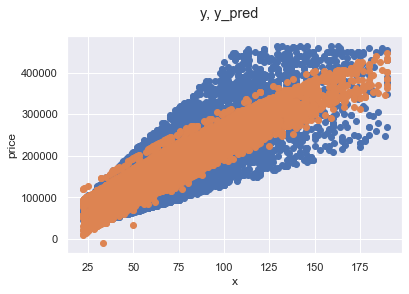

In [19]:
sns.set()
data_pred = pd.DataFrame(Dicto["data_pred"][0])
visualizacion_dos_scatter(data, data_pred, "surface_total_in_m2", "price", "y_pred")

In [20]:
# Excepcion en llave
Dicto["models"]
Dicto.keys()

dict_keys(['data_cruda', 'surface_nan', 'data', 'data_pred', 'dummy_place', 'models'])

In [21]:
Dicture["linreg"][0]  # X de linreg

,surface_total_in_m2,sup_total_pow2,sup_descubierta_pct,above_mean,Abasto,Acassuso,Adrogué,Balvanera,Banfield,Barracas,...,San Nicolás,Santos Lugares,Victoria,Villa Bosch,Villa Crespo,Villa Devoto,Villa Luzuriaga,Villa Pueyrredón,Wilde,otros
0,55.0,3025.0,0.000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40.0,1600.0,30.000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,2704.0,7.692308,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,50.0,2500.0,24.000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,51.0,2601.0,9.803922,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15937,36.0,1296.0,8.333333,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15938,36.0,1296.0,8.333333,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15939,30.0,900.0,6.666667,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15940,34.0,1156.0,5.882353,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


--------------------
## Preparación de una muestra para aplicar el modelo entrenado

In [22]:
## Celda 18
serie_same = pd.Series(Dicto["dummy_place"][1])
serie_same

serie_filter = pd.DataFrame(Dicto["data"][0])
serie_filter = serie_filter.place_name.unique()
serie_filter;

In [23]:
## Celda 19
muestra = pd.read_csv("muestra_currency_nan.csv")
muestra = muestra[muestra["surface_total_in_m2"] < 350]
muestra = muestra.drop(list(muestra.columns)[0], axis=1)
mask_1 = muestra.property_type == "apartment"
mask_2 = muestra.place_name.isin(
    serie_same
)  # 2193 - 1959 = 230: muestras más, si en vez de usar serie_same, usamos serie filter, (obtenemos una muesrta más grande, y después hay que matchiar los otros con los otros) no vale

# Muestra_pred
muestra = muestra[mask_1 & mask_2]
# display(muestra)
Dicto["muestra"] = muestra.to_dict(), data_info(muestra, "muestra").to_dict()
Dicto["muestra_pred"] = muestra.to_dict(), data_info(muestra, "muestra").to_dict()


## Muestra
muestra = variables_feature(muestra)
Dicto["muestra"] = muestra.to_dict(), data_info(muestra, "muestra").to_dict()
muestra

,property_type,place_name,state_name,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,sup_total_pow2,sup_descubierta_pct
35,apartment,La Plata,Bs.As. G.B.A. Zona Sur,NaN,NaN,55.0,55.0,NaN,3025.0,0.000000
46,apartment,Recoleta,Capital Federal,NaN,NaN,147.0,135.0,NaN,21609.0,8.163265
61,apartment,Balvanera,Capital Federal,NaN,NaN,76.0,76.0,NaN,5776.0,0.000000
74,apartment,La Plata,Bs.As. G.B.A. Zona Sur,NaN,NaN,120.0,120.0,NaN,14400.0,0.000000
75,apartment,Villa Devoto,Capital Federal,NaN,NaN,68.0,NaN,NaN,4624.0,NaN
...,...,...,...,...,...,...,...,...,...,...
15529,apartment,Castelar,Bs.As. G.B.A. Zona Oeste,NaN,NaN,100.0,94.0,NaN,10000.0,6.000000
15530,apartment,Castelar,Bs.As. G.B.A. Zona Oeste,NaN,NaN,100.0,94.0,NaN,10000.0,6.000000
15531,apartment,Castelar,Bs.As. G.B.A. Zona Oeste,NaN,NaN,53.0,44.0,NaN,2809.0,16.981132
15533,apartment,Castelar,Bs.As. G.B.A. Zona Oeste,NaN,NaN,52.0,48.0,NaN,2704.0,7.692308


In [24]:
######### CONSERVANDO LAS DIMENSIONES EN TODAS LAS MUESTRAS

display(data_info(muestra, "muestra"))
analisis_nans(
    muestra.loc[:, ["surface_total_in_m2", "surface_covered_in_m2", "place_name"]]
)
print()
print('Accion a tomar: limpiar en funcion de los nans de "sup_descubierta_pct"')

muestra = muestra.loc[muestra.sup_descubierta_pct.notna()]
muestra = muestra.drop("surface_covered_in_m2", axis=1)
lista_filter = muestra.index

Dicto["muestra"] = (
    muestra.to_dict(),
    data_info(muestra, "muestra").to_dict(),
)  # GUARDO MUESTRA

muestra = pd.DataFrame(Dicto["muestra_pred"][0])  # CARGO OTRA MUESRTA
muestra = muestra.filter(lista_filter, axis=0)  # MODIFICO OTRA MUESRTA
Dicto["muestra_pred"] = (
    muestra.to_dict(),
    data_info(muestra, "muestra").to_dict(),
)  # GUARDO OTRA MUESRTA

muestra = pd.DataFrame(Dicto["muestra"][0])  # CARGO MUESTRA

df de muestra,columna,Nan,dtype,count,pct_nan,count_unique
index,,,,,,
0,property_type,0,object,1785,0.00,1
1,place_name,0,object,1785,0.00,44
2,state_name,0,object,1785,0.00,6
3,price,1785,float64,0,100.00,0
4,currency,1785,float64,0,100.00,0
5,surface_total_in_m2,0,float64,1785,0.00,189
6,surface_covered_in_m2,390,float64,1395,21.85,161
7,price_usd_per_m2,1785,float64,0,100.00,0
8,sup_total_pow2,0,float64,1785,0.00,189


ANALISIS DE NANS
surface_covered_in_m2    390
Cantidad de elemento: 1785
Interseccion entre los nan encuentra: 390 elementos
Union entre los nan encuentra: 390 elementos

Accion a tomar: limpiar en funcion de los nans de "sup_descubierta_pct"


In [25]:
## Celda 21
data_check = pd.read_csv("data_apartment_4_statistic.csv")
data_check = data_check.rename({"Unnamed: 0": "place_name"}, axis=1)
data_check.set_index("place_name", inplace=True)

apartment_mean = data_check["apartment_mean_surface_total_in_m2"].dropna()
lista_place_name = apartment_mean.index
lista_apartment_mean = apartment_mean.values

for i, elemento in enumerate(lista_place_name):
    # display(np.array((muestra.loc[mascara_iter_1 & (muestra.place_name == elemento), 'surface_total_in_m2']) >= lista_apartment_mean[i]).astype(int)) # columna dummy
    muestra.loc[(muestra.place_name == elemento), "above_mean"] = np.array(
        (muestra.loc[(muestra.place_name == elemento), "surface_total_in_m2"])
        >= lista_apartment_mean[i]
    ).astype(int)

muestra

,property_type,place_name,state_name,price,currency,surface_total_in_m2,price_usd_per_m2,sup_total_pow2,sup_descubierta_pct,above_mean
35,apartment,La Plata,Bs.As. G.B.A. Zona Sur,NaN,NaN,55.0,NaN,3025.0,0.000000,0.0
46,apartment,Recoleta,Capital Federal,NaN,NaN,147.0,NaN,21609.0,8.163265,1.0
61,apartment,Balvanera,Capital Federal,NaN,NaN,76.0,NaN,5776.0,0.000000,1.0
74,apartment,La Plata,Bs.As. G.B.A. Zona Sur,NaN,NaN,120.0,NaN,14400.0,0.000000,1.0
83,apartment,La Plata,Bs.As. G.B.A. Zona Sur,NaN,NaN,120.0,NaN,14400.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...
15529,apartment,Castelar,Bs.As. G.B.A. Zona Oeste,NaN,NaN,100.0,NaN,10000.0,6.000000,1.0
15530,apartment,Castelar,Bs.As. G.B.A. Zona Oeste,NaN,NaN,100.0,NaN,10000.0,6.000000,1.0
15531,apartment,Castelar,Bs.As. G.B.A. Zona Oeste,NaN,NaN,53.0,NaN,2809.0,16.981132,1.0
15533,apartment,Castelar,Bs.As. G.B.A. Zona Oeste,NaN,NaN,52.0,NaN,2704.0,7.692308,1.0


In [26]:
##dummy de la muestra, reacondicionamiento
dummy_place_sample = pd.get_dummies(muestra.place_name)

lista_dummy_original = serie_same.values
lista_dummy_muestra = dummy_place_sample.columns

difference_1 = set(lista_dummy_original).difference(
    set(lista_dummy_muestra)
)  ##diference 1 es clave, son los valores que debo excluir del set de entrenamiento para mejorar la estimacion sobre la muestra
difference_2 = set(lista_dummy_muestra).difference(set(lista_dummy_original))
list_difference = list(difference_1.union(difference_2))
print(
    list_difference
)  # https://www.delftstack.com/es/howto/python/difference-between-two-lists-python/

dummy_place_sample.loc[:, difference_1] = 0
dummy_place_sample.columns;

['San Justo', 'Beccar', 'otros', 'Villa Bosch', 'Villa Luzuriaga', 'Barrio Los Alisos', 'Wilde', 'Adrogué']


In [27]:
# Acá estuvimos manoseando muestra, y creamos X, acá aparece Dicture
X = pd.concat([muestra[features_1], dummy_place_sample], axis=1)
X = X[X["surface_total_in_m2"] < 350]
# podriamos predecir acá
Dicture["muestra_1"] = X, 0, 0, 0, 1

In [28]:
###CHEQUEO DE NANS ENTRE INSTANCIAS DE MUESTRAS
Visualizar = False

if Visualizar:
    df = data_info(muestra)
    instancias = [pd.DataFrame(Dicto["muestra_pred"][1]), df]
    labels = ["muestra_1", "muestra actual"]
    sns.set()

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22, 4))
    fig.suptitle("PORCENTAJE NANS [%]")
    fig.subplots_adjust(wspace=0.4)

    for i in range(len(instancias)):
        df_i = instancias[i]
        ax[i].barh(df_i.columna, df_i.pct_nan)
        ax[i].set(xlim=(0, 100), title="dataset: " + labels[i])
        ax[i].minorticks_on()
        ax[i].grid(which="minor", axis="x", lw=1, alpha=0.4)

----------
## Predecir valores de la muestra

In [29]:
## Celda 25

array_predict = linreg.predict(X)

muestra_pred = pd.DataFrame(Dicto["muestra_pred"][0])
muestra_pred = muestra_pred[muestra_pred["surface_total_in_m2"] < 350]
muestra_pred["y_pred"] = array_predict
Dicto["muestra_pred"] = (
    muestra_pred.to_dict(),
    data_info(muestra_pred, "muestra_pred").to_dict(),
)


a = "muestra_1"
Dicture[a] = Dicture[a][0], Dicture[a][1], Dicture[a][2], Dicture[a][3], array_predict

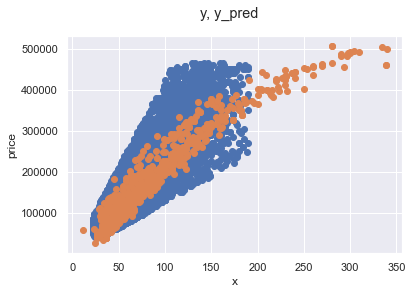

In [30]:
visualizacion_dos_scatter(
    data, muestra_pred, x="surface_total_in_m2", y_1="price", y_2="y_pred"
)
# x: surface_total_in_m2
# puntos azules: valores reales de departamentos
# puntos naranjas: valores predicho sobre una muestra sin valores reales

    Conclusion:
        
        - El modelo predice mal para valores grandes de departamentos.
        - Se debe diferenciar por place_name para identificar los barrios en los que el modelo responde al patrón de precios

------------
**COMPROBACION VISUAL DEL RANGO DE APLICACION DEL MODELO**

In [31]:
## Celda 27
dataview_1 = data[["property_type", "surface_total_in_m2"]]
dataview_1["place_name"] = place_name_2
dataview_1["price"] = data.price

dataview_1["id"] = 1

dataview_1

,property_type,surface_total_in_m2,place_name,price,id
0,apartment,55.0,Mataderos,72000.000000,1
1,apartment,40.0,Mataderos,67000.000000,1
2,apartment,52.0,Mataderos,90000.000000,1
3,apartment,50.0,Mataderos,88000.000000,1
4,apartment,51.0,Mataderos,93600.000000,1
...,...,...,...,...,...
15937,apartment,36.0,otros,63759.245132,1
15938,apartment,36.0,otros,63759.245132,1
15939,apartment,30.0,otros,52140.893797,1
15940,apartment,34.0,otros,58375.131099,1


In [32]:
dataview_2 = muestra_pred[
    ["property_type", "surface_total_in_m2", "place_name", "y_pred"]
]

place_missing = set(place_name_2).difference(
    set(muestra_pred.place_name)
)  # eliminar de la muestra original

dataview_2["id"] = 2

dataview_2

,property_type,surface_total_in_m2,place_name,y_pred,id
35,apartment,55.0,La Plata,108106.151532,2
46,apartment,147.0,Recoleta,309238.719875,2
61,apartment,76.0,Balvanera,196266.112129,2
74,apartment,120.0,La Plata,253111.530299,2
83,apartment,120.0,La Plata,253111.530299,2
...,...,...,...,...,...
15529,apartment,100.0,Castelar,219135.728994,2
15530,apartment,100.0,Castelar,219135.728994,2
15531,apartment,53.0,Castelar,100094.108227,2
15533,apartment,52.0,Castelar,103782.384828,2


In [33]:
## Celda 29
dataview_1 = dataview_1.drop(
    dataview_1[dataview_1.place_name.isin(list(place_missing))].index
)
#
print(
    "Si eliminamos los elementos de place_missing de la muestra de entrenamiento, estaríamos entrenando ajustando a esta muestra de verificacion."
)
#
dataview_1

Si eliminamos los elementos de place_missing de la muestra de entrenamiento, estaríamos entrenando ajustando a esta muestra de verificacion.


,property_type,surface_total_in_m2,place_name,price,id
0,apartment,55.0,Mataderos,72000.000000,1
1,apartment,40.0,Mataderos,67000.000000,1
2,apartment,52.0,Mataderos,90000.000000,1
3,apartment,50.0,Mataderos,88000.000000,1
4,apartment,51.0,Mataderos,93600.000000,1
...,...,...,...,...,...
15638,apartment,75.0,Güemes,168000.000000,1
15639,apartment,75.0,Güemes,155546.714375,1
15640,apartment,61.0,Güemes,132000.000000,1
15641,apartment,61.0,Güemes,123511.349226,1


In [34]:
dataview_2.rename({"y_pred": "price"}, axis=1, inplace=True)
dataview_1 = dataview_1.append(dataview_2)

In [35]:
## Celda 31 - A VER (!)
# g = sns.FacetGrid(dataview_1, row = 'place_name', hue='id', sharex=False, sharey=False)
# g.map(sns.scatterplot, 'surface_total_in_m2', 'price')
# g.add_legend()

###  Parte 2 - Ridge

In [36]:
import numpy as np
import pandas as pd


from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
def check_fit_transform(X):
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    X.columns.name = "fit_transform"
    return display(X)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11998 entries, 0 to 15941
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        11998 non-null  object 
 1   place_name           11998 non-null  object 
 2   state_name           11998 non-null  object 
 3   price                11998 non-null  float64
 4   currency             11998 non-null  object 
 5   surface_total_in_m2  11998 non-null  float64
 6   price_usd_per_m2     11998 non-null  float64
 7   above_mean           11998 non-null  float64
 8   sup_total_pow2       11998 non-null  float64
 9   sup_descubierta_pct  11998 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [39]:
## Celda 36

scaler = StandardScaler()

df = data_info(data)
## data.loc[:,data.columns.isin(df[df['dtype'] == 'float64'].columna.values)] #check
X = data.loc[:, data.columns.isin(df[df["dtype"] == "float64"].columna.values)]
X = X.drop(["price", "above_mean", "price_usd_per_m2"], axis=1)

Dicture["model_ridge_cv"] = X, 1, 0, 0, 0


y = data.price

Dicture["model_ridge_cv"] = X, y, 0, 0, 0


check_fit_transform(X)  # funcion creada


X_std = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


Dicture["model_ridge_cv"] = X_std, y, 0, 0, 0


X_std.columns.name = "X_std"
display(X_std)

fit_transform,surface_total_in_m2,sup_total_pow2,sup_descubierta_pct
0,-0.330335,-0.406726,-0.901216
1,-0.815811,-0.672402,1.775178
2,-0.427430,-0.466573,-0.214961
3,-0.492160,-0.504607,1.239899
4,-0.459795,-0.485777,-0.026578
...,...,...,...
11993,-0.945271,-0.729080,-0.157773
11994,-0.945271,-0.729080,-0.157773
11995,-1.139461,-0.802910,-0.306462
11996,-1.010001,-0.755181,-0.376433


X_std,surface_total_in_m2,sup_total_pow2,sup_descubierta_pct
0,-0.330335,-0.406726,-0.901216
1,-0.815811,-0.672402,1.775178
2,-0.427430,-0.466573,-0.214961
3,-0.492160,-0.504607,1.239899
4,-0.459795,-0.485777,-0.026578
...,...,...,...
11993,-0.945271,-0.729080,-0.157773
11994,-0.945271,-0.729080,-0.157773
11995,-1.139461,-0.802910,-0.306462
11996,-1.010001,-0.755181,-0.376433


In [40]:
### ACA TENEMOS QUE ACTUALIZAR Dicto[models] pero vamos a esperar para hacerlo en 2 modelos al mismo tiempo

# nueva convencion: si se crea un modelo y se fitea en otra variable se crea un string de la instanciacion con los hiperparámetros

Dicture["model_ridge_cv"] = X_std, y, 0, 0, 0, "str"

In [41]:
# 4 Division
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.3, random_state=117
)

# 1 y 2. Defino el modelo y los hiperparámetros - #creo un modelo que no lo entreno
model_ridge_cv = linear_model.RidgeCV(
    alphas=[
        0.3,
        0.5,
        1.0,
        1.1,
        1.15,
        1.17,
        1.18,
        1.19,
        1.2,
        1.21,
        1.22,
        1.3,
        1.4,
        1.5,
        10.0,
    ],
    fit_intercept=True,
    normalize=False,
    cv=10,
)

# agregar #1 y 2 en string
Dicture["model_ridge_cv"] = (
    Dicture["model_ridge_cv"][0],
    Dicture["model_ridge_cv"][1],
    Dicture["model_ridge_cv"][2],
    Dicture["model_ridge_cv"][3],
    Dicture["model_ridge_cv"][3],
    "model_ridge_cv = linear_model.RidgeCV(alphas= [0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 10.0], fit_intercept=True, normalize=False, cv=10)",
)


# 5. Entreno el modelo
model_fit_ridge_cv = model_ridge_cv.fit(X_train, y_train)
Model["model_fit_ridge_cv"] = model_fit_ridge_cv, 0, 0

array_predict = model_fit_ridge_cv.predict(X_train)
Dicture["model_fit_ridge_cv"] = X_std, y, 1, 1, 1, 1, "str"
Dicture["model_fit_ridge_cv"] = (
    X_std,
    y,
    pd.DataFrame({"B_0": {"model_fit_ridge_cv": model_fit_ridge_cv.intercept_}}),
    model_fit_ridge_cv.coef_,
    array_predict,
    model_fit_ridge_cv.alpha_,
    str(model_fit_ridge_cv.best_score_),
)

Model["model_fit_ridge_cv"] = (
    Model["model_fit_ridge_cv"][0],
    Dicture["model_fit_ridge_cv"],
    Model["model_fit_ridge_cv"][2],
)

In [42]:
### Parámetros del modelo entrenado, performance:

print(f'alpha_: {"%.2f" % model_fit_ridge_cv.alpha_}')
print(f'best_score_: {"%.2f" % model_fit_ridge_cv.best_score_}')

alpha_: 1.00
best_score_: 0.72


In [43]:
# . elijo el modelo

best_alpha = model_fit_ridge_cv.alpha_
model_ridge = linear_model.Ridge(alpha=best_alpha, fit_intercept=True, normalize=False)

In [44]:
Dicture["model_ridge"] = (
    X_std,
    y,
    0,
    0,
    0,
    "model_ridge = linear_model.Ridge(alpha = best_alpha, fit_intercept = True, normalize = False)",
)

Dicture["model_fit_ridge"] = X_std, y, 1, 1, 1, "str"

In [45]:
# . entreno
model_fit_ridge = model_ridge.fit(X_train, y_train)


Model["model_fit_ridge"] = model_fit_ridge, 1, 1
array_predict = model_fit_ridge.predict(X_train)
Dicture["model_fit_ridge"] = (
    Dicture["model_fit_ridge"][0],
    Dicture["model_fit_ridge"][1],
    pd.DataFrame({"B_0": {"model_fit_ridge": model_fit_ridge.intercept_}}),
    model_fit_ridge.coef_,
    array_predict,
    str(model_fit_ridge.score(X_train, y_train)),
)

# Exposicion de modelo:
print(model_fit_ridge.coef_)
print(model_fit_ridge.intercept_)
print(model_fit_ridge.score(X_train, y_train))

[ 94609.04185075 -21086.11847467  -5106.73881089]
157599.96476792355
0.7229801577388337


In [46]:
## EVALUACION DE LA PERFOMANCE DEL MODELO CON RIDGE
model_fit_ridge.score(X_test, y_test)

# Conclusion: expresar la formula y verificar por coeficientes que sean iguales

0.7198657986125305

------------------
Actualizacion de Dicto
--------------
-------

In [47]:
## crear funcion en base a la celda de abajo


def actualizar_Dicto_models():
    difference_3 = set(Model.keys()).difference(set(Dicto["models"].index))
    print(difference_3)

    for indice in difference_3:

        try:
            if Dicture[indice][3] == 0:
                etiqueta = '\n\tINTERCEPTO NO DEFINIDO EN "{}"\n'.format(indice)
                print("=" * 80 + etiqueta + "=" * 80)
                pass
            if Dicture[indice][3] == 1:
                etiqueta = '\n\tNO ESTA DEFINIDO EL INTERCEPTO EN "{}"\n'.format(indice)
                print("=" * 40 + etiqueta + "=" * 40)
                pass
        except:
            frame = dict(
                zip(list(Dicture[indice][0].columns), list(Dicture[indice][3]))
            )  # el list es importante para borrar el name a la column
            frame = pd.DataFrame({indice: pd.Series(frame)}).T
            frame = (Dicture[indice][2]).join(frame)
            Dicto["models"] = Dicto["models"].append(frame)


"""
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
~\AppData\Local\Temp/ipykernel_2120/3502676010.py in <module>
      1 display (Dicto['models'])
----> 2 actualizar_Dicto_models()
      3 display (Dicto['models'])

~\AppData\Local\Temp/ipykernel_2120/257676095.py in actualizar_Dicto_models()
      6 
      7     for indice in difference_3:
----> 8         frame = dict(zip(list(Dicture[indice][0].columns) , list(Dicture[indice][3])))    # el list es importante para borrar el name a la column
      9         frame = pd.DataFrame({indice: pd.Series(frame)}).T
     10         frame = (Dicture[indice][2]).join(frame)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'



---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
~\AppData\Local\Temp/ipykernel_8652/3502676010.py in <module>
      1 display (Dicto['models'])
----> 2 actualizar_Dicto_models()
      3 display (Dicto['models'])

~\AppData\Local\Temp/ipykernel_8652/2550046604.py in actualizar_Dicto_models()
      6 
      7     for indice in difference_3:
----> 8         frame = dict(zip(list(Dicture[indice][0].columns) , list(Dicture[indice][3])))    # el list es importante para borrar el name a la column
      9         frame = pd.DataFrame({indice: pd.Series(frame)}).T
     10         frame = (Dicture[indice][2]).join(frame)

TypeError: 'int' object is not iterable
    
    """;

In [48]:
difference_3 = set(Model.keys()).difference(set(Dicto["models"].index))
print(difference_3)

for indice in difference_3:

    Dicture[indice][2]  # + pd.DataFrame(Dicture['model_fit_ridge_cv'][3])

    frame = dict(
        zip(list(Dicture[indice][0].columns), list(Dicture[indice][3]))
    )  # el list es importante para borrar el name a la column

    frame = pd.DataFrame({indice: pd.Series(frame)}).T

    frame = (Dicture[indice][2]).join(frame)

    display(frame)
    Dicto["models"] = Dicto["models"].append(frame)

Dicto["models"]

{'model_fit_ridge', 'model_fit_ridge_cv'}


,B_0,surface_total_in_m2,sup_total_pow2,sup_descubierta_pct
model_fit_ridge,157599.964768,94609.041851,-21086.118475,-5106.738811


,B_0,surface_total_in_m2,sup_total_pow2,sup_descubierta_pct
model_fit_ridge_cv,157599.964768,94609.041851,-21086.118475,-5106.738811


,B_0,surface_total_in_m2,sup_total_pow2,sup_descubierta_pct,above_mean,Abasto,Acassuso,Adrogué,Balvanera,Banfield,...,San Nicolás,Santos Lugares,Victoria,Villa Bosch,Villa Crespo,Villa Devoto,Villa Luzuriaga,Villa Pueyrredón,Wilde,otros
linreg,-9937.248892,3022.893016,-4.233447,-674.644869,-3327.210774,-14166.439444,15875.596065,4243.090847,-32848.633034,-26120.631942,...,-19238.136997,-36862.94185,2615.471643,-34085.57149,4461.689484,-6837.738448,-41009.703198,-1672.322151,-38066.720057,-22402.528691
model_fit_ridge,157599.964768,94609.041851,-21086.118475,-5106.738811,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_fit_ridge_cv,157599.964768,94609.041851,-21086.118475,-5106.738811,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<u>**Evaluacion del modelo sobre la muestra**<u>

In [49]:
df = data_info(muestra, "muestra")
columnas_float = df.loc[(df["dtype"] == "float64"), "columna"].values

muestra = muestra.loc[:, columnas_float].dropna(axis=1)

muestra

,surface_total_in_m2,sup_total_pow2,sup_descubierta_pct,above_mean
35,55.0,3025.0,0.000000,0.0
46,147.0,21609.0,8.163265,1.0
61,76.0,5776.0,0.000000,1.0
74,120.0,14400.0,0.000000,1.0
83,120.0,14400.0,0.000000,1.0
...,...,...,...,...
15529,100.0,10000.0,6.000000,1.0
15530,100.0,10000.0,6.000000,1.0
15531,53.0,2809.0,16.981132,1.0
15533,52.0,2704.0,7.692308,1.0


In [50]:
# ya sabemos que normalizar no admite dummys
Dicto["muestra"] = muestra.to_dict(), data_info(muestra, "muestra")
muestra.drop("above_mean", axis=1, inplace=True)

In [51]:
check_fit_transform(muestra)

X = scaler.fit_transform(muestra)

Dicture["muestra_2"] = (
    X,
    0,
    0,
    0,
    1,
    "y_pred_muestra_currency_nan",
)  # el 1 porque me interesa ese valor son 3 dataset y 2 array, y 1 string

muestra = pd.DataFrame(Dicto["muestra_pred"][0])
array_predict = model_fit_ridge.predict(X)
muestra["y_pred_ridge"] = array_predict
Dicto["muestra_pred"] = muestra.to_dict(), data_info(muestra, "muestra_pred").to_dict()

muestra = pd.DataFrame(Dicto["muestra"][0])

fit_transform,surface_total_in_m2,sup_total_pow2,sup_descubierta_pct
0,-0.438747,-0.391905,-0.908293
1,1.382602,0.937032,-0.256736
2,-0.023005,-0.195181,-0.908293
3,0.848076,0.421519,-0.908293
4,0.848076,0.421519,-0.908293
...,...,...,...
1390,0.452130,0.106876,-0.429399
1391,0.452130,0.106876,-0.429399
1392,-0.478342,-0.407351,0.447068
1393,-0.498139,-0.414859,-0.294326


###  Parte 3 Lasso

In [52]:
# IMPORTS FOR LASSO
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ASUMIENDO TODAS NUESRTAS VARIABLE NUMERICAS
feature = ["surface_total_in_m2", "sup_total_pow2", "sup_descubierta_pct", "above_mean"]
X = data[feature]
scaler = StandardScaler()

X_std = pd.DataFrame(
    scaler.fit_transform(X), columns=X.columns
)  # <------------------------- así se hace
# X_std['above_mean'] = X['above_mean'] ## es raro que lasso acepte dummy estandarizada pero no con 0 y 1

y = data.price


Dicture["model_lasso_cv"] = (
    X_std,
    y,
    0,
    0,
    0,
    "linear_model.LassoCV(alphas= [0.05, 0.06, 0.07, 0.08, 0.09, 0.95, 0.97, 0.1, 0.12, 0.15, 0.2, 0.3, 1.0, 10.0], fit_intercept=True, normalize=False, cv=10, max_iter=1e4)",
)
Dicture["model_fit_lasso_cv"] = X_std, y, 0, 0, 0, "hiperparámetros: take_it"
Dicture["model_lasso"] = (
    X_std,
    y,
    0,
    0,
    0,
    "model_lasso = linear_model.Lasso(alpha = take_it, fit_intercept = True, normalize = False)",
)
Dicture["model_fit_lasso"] = X_std, y, 1, 1, 0, "performance"


# (3)
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.3, random_state=117
)
# (1), (2)
model_lasso_cv = linear_model.LassoCV(
    alphas=[
        0.05,
        0.06,
        0.07,
        0.08,
        0.09,
        0.95,
        0.97,
        0.1,
        0.12,
        0.15,
        0.2,
        0.3,
        1.0,
        10.0,
    ],
    fit_intercept=True,
    normalize=False,
    cv=10,
    max_iter=1e4,
)
# (5)
model_fit_lasso_cv = model_lasso_cv.fit(X_train, y_train)


indice = "model_fit_lasso_cv"
Dicture["model_fit_lasso_cv"] = (
    Dicture[indice][0],
    Dicture[indice][1],
    Dicture[indice][2],
    Dicture[indice][2],
    Dicture[indice][4],
    model_fit_lasso_cv.alpha_,
    str(model_fit_lasso_cv.score(X_train, y_train)),
)
Model[indice] = model_fit_lasso_cv, 1, Dicture[indice]

print(Dicture["model_fit_lasso_cv"][5])
print(Dicture["model_fit_lasso_cv"][6])

# (1, 2)
take_it = Dicture["model_fit_lasso_cv"][5]  # model_fit_lasso_cv.alpha_
model_lasso = linear_model.Lasso(alpha=take_it, fit_intercept=True, normalize=False)

# (5)
model_fit_lasso = model_lasso.fit(X_train, y_train)
indice = "model_fit_lasso"
# array_predict = predecir modelo con X_train: no, entonces cero
Dicture["model_fit_lasso"] = (
    X_std,
    y,
    pd.DataFrame({"B_0": {indice: model_fit_lasso.intercept_}}),
    model_fit_lasso.coef_,
    0,
    str(model_fit_lasso.score(X_test, y_test)),
)

Model[indice] = model_fit_lasso, 1, Dicture[indice]

print(model_fit_lasso.coef_)
print(model_fit_lasso.intercept_)
print(model_fit_lasso.score(X_test, y_test))

0.05
0.7272384189120737
[112229.92673503 -31900.0780448   -5225.29672557  -9349.09066318]
157584.84344429235
0.7246395515095462


In [53]:
X_std.head()

,surface_total_in_m2,sup_total_pow2,sup_descubierta_pct,above_mean
0,-0.330335,-0.406726,-0.901216,-0.806439
1,-0.815811,-0.672402,1.775178,-0.806439
2,-0.427430,-0.466573,-0.214961,-0.806439
3,-0.492160,-0.504607,1.239899,-0.806439
4,-0.459795,-0.485777,-0.026578,-0.806439


In [54]:
Dicture["model_fit_lasso_cv"][3]

0

In [55]:
display(Dicto["models"])
actualizar_Dicto_models()
display(Dicto["models"])

,B_0,surface_total_in_m2,sup_total_pow2,sup_descubierta_pct,above_mean,Abasto,Acassuso,Adrogué,Balvanera,Banfield,...,San Nicolás,Santos Lugares,Victoria,Villa Bosch,Villa Crespo,Villa Devoto,Villa Luzuriaga,Villa Pueyrredón,Wilde,otros
linreg,-9937.248892,3022.893016,-4.233447,-674.644869,-3327.210774,-14166.439444,15875.596065,4243.090847,-32848.633034,-26120.631942,...,-19238.136997,-36862.94185,2615.471643,-34085.57149,4461.689484,-6837.738448,-41009.703198,-1672.322151,-38066.720057,-22402.528691
model_fit_ridge,157599.964768,94609.041851,-21086.118475,-5106.738811,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_fit_ridge_cv,157599.964768,94609.041851,-21086.118475,-5106.738811,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


{'model_fit_lasso', 'model_fit_lasso_cv'}
	INTERCEPTO NO DEFINIDO EN "model_fit_lasso_cv"


,B_0,surface_total_in_m2,sup_total_pow2,sup_descubierta_pct,above_mean,Abasto,Acassuso,Adrogué,Balvanera,Banfield,...,San Nicolás,Santos Lugares,Victoria,Villa Bosch,Villa Crespo,Villa Devoto,Villa Luzuriaga,Villa Pueyrredón,Wilde,otros
linreg,-9937.248892,3022.893016,-4.233447,-674.644869,-3327.210774,-14166.439444,15875.596065,4243.090847,-32848.633034,-26120.631942,...,-19238.136997,-36862.94185,2615.471643,-34085.57149,4461.689484,-6837.738448,-41009.703198,-1672.322151,-38066.720057,-22402.528691
model_fit_ridge,157599.964768,94609.041851,-21086.118475,-5106.738811,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_fit_ridge_cv,157599.964768,94609.041851,-21086.118475,-5106.738811,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_fit_lasso,157584.843444,112229.926735,-31900.078045,-5225.296726,-9349.090663,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<u>**APLICO EL MODELO A LA MUESTRA**<U>

In [56]:
Dicture["model_fit_lasso"][0]

,surface_total_in_m2,sup_total_pow2,sup_descubierta_pct,above_mean
0,-0.330335,-0.406726,-0.901216,-0.806439
1,-0.815811,-0.672402,1.775178,-0.806439
2,-0.427430,-0.466573,-0.214961,-0.806439
3,-0.492160,-0.504607,1.239899,-0.806439
4,-0.459795,-0.485777,-0.026578,-0.806439
...,...,...,...,...
11993,-0.945271,-0.729080,-0.157773,-0.806439
11994,-0.945271,-0.729080,-0.157773,-0.806439
11995,-1.139461,-0.802910,-0.306462,-0.806439
11996,-1.010001,-0.755181,-0.376433,-0.806439


In [57]:
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(muestra), columns=muestra.columns)
Dicture["muestra_3"] = X_std, 0, 0, 0, 1, "prediccion lasso sobre muestra currency_nan"

array_predict = model_fit_lasso.predict(X_std)
Dicture["muestra_3"] = (
    X_std,
    0,
    0,
    0,
    array_predict,
    "prediccion lasso sobre muestra currency_nan",
)

muestra_pred = pd.DataFrame(Dicto["muestra_pred"][0])
muestra_pred["y_pred_lasso"] = array_predict

Dicto["muestra_pred"] = (
    muestra_pred.to_dict(),
    data_info(muestra_pred, "muestra_pred").to_dict(),
)

In [58]:
data_aux = Dicture["linreg"][0]

data_aux
x = data_aux.surface_total_in_m2
x
y = Dicture["linreg"][4]
y

array([114666.94092472,  85437.48544443, 103173.94032773, ...,
       183902.6427086 , 145981.25861524, 184127.53753898])

###  COMPROBACION VISUAL DE LOS MODELOS



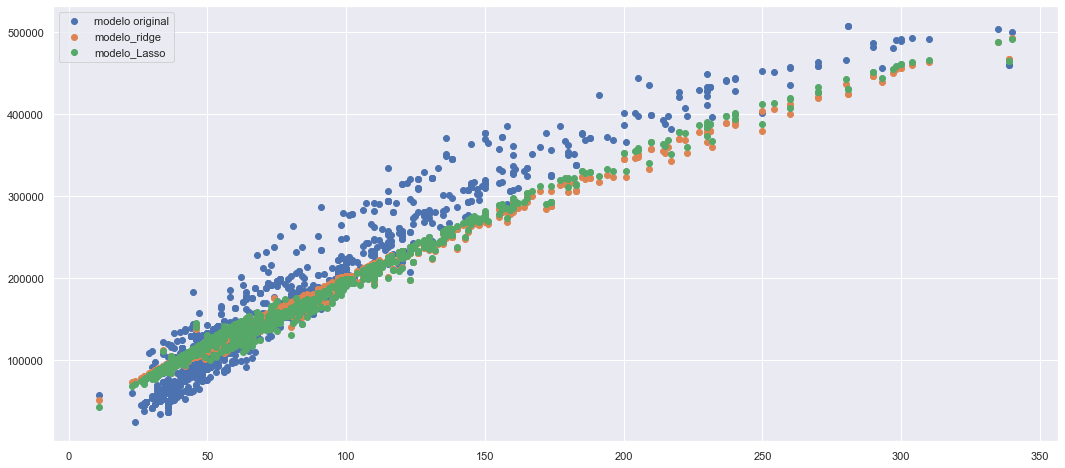

In [59]:
fig = plt.figure(figsize=(18, 8))


### error en dicture: la y_pred de entrnamiento no es del same len que el X del [0]
# data_aux = Dicture['linreg'][0]
# x = data_aux.surface_total_in_m2
# y = Dicture['linreg'][4]
# plt.scatter(x,y, label='modelo entrenamiento')


x = muestra.surface_total_in_m2
y = muestra_pred.y_pred
plt.scatter(x, y, label="modelo original")
y = muestra_pred.y_pred_ridge
plt.scatter(x, y, label="modelo_ridge")
y = muestra_pred.y_pred_lasso
plt.scatter(x, y, label="modelo_Lasso")

plt.legend()

### MODELO ORIGINAL

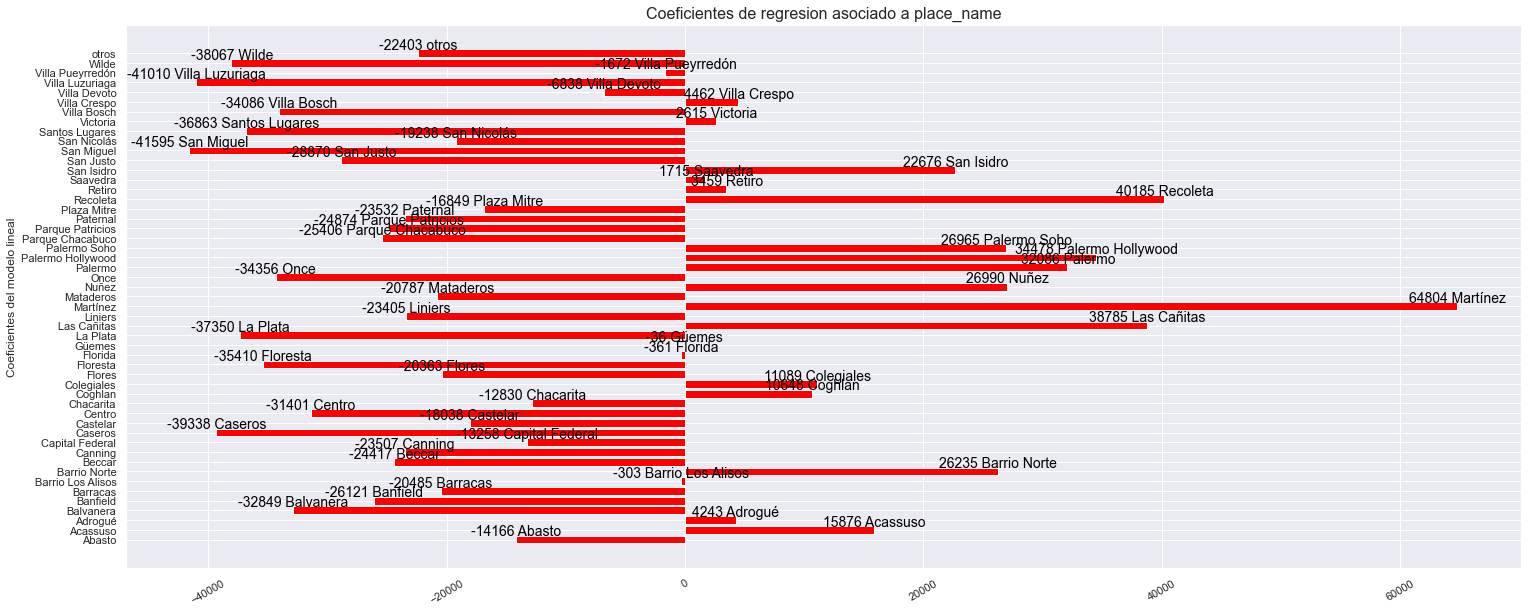

In [72]:
# NECESITO SOLO LOS COEFICIENTES DE LOS LUGARES Y LOS COEFICIENTES SON: SUPERFICIE_TOTAL, SUPERFICIE_POW2, SUP_DESCU_PCT, ABOVE_MEAN
feature_cols = list(pd.DataFrame(Dicto["dummy_place"][0]).columns)
lista_coeficientes = list(linreg.coef_)
lista_coeficientes_dummy_place = lista_coeficientes[
    4:
]  # las primera 4 columnas son de otra cosa

fig, ax = plt.subplots(figsize=(25, 10))
barras = ax.barh(feature_cols, lista_coeficientes_dummy_place, color="red")
# ax.axhline(0, color='black',linewidth=1)
ax.set_ylabel("Coeficientes del modelo lineal")
plt.xticks(rotation=30)
plt.title("Coeficientes de regresion asociado a place_name", size=16)

for i, barra in enumerate(barras):
    x = barra.get_y()
    y = barra.get_height()
    ancho = barra.get_width()
    if y > 0:
        plt.text(
            x + ancho,
            y + x,
            str(round(ancho)) + " " + feature_cols[i],
            fontsize=14,
            color="black",
            ha="center",
            size=14,
        )
    # else:
    #    plt.text(x+ancho/2,y-10,round(y,2),fontsize=14,color='black',ha='center',size=14)

#################################################################################################